Bayesian Statistical Inference

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pylab

PART A: Maximum Likelihood Point Estimation

Exercise A:1 - Maximum Likelihood Estimation of μ and σ

In [2]:
# generate data
mu = 2
sigma = 0.1
N = 50
X = np.random.normal(loc=mu, scale=sigma, size=N)

# define grid
mu_first=0
mu_last=3
delta_mu=0.005
sigma_first=0.01
sigma_last=0.2
delta_sigma=0.001
mu_grid = np.arange(mu_first, mu_last+delta_mu, delta_mu)
sigma_grid = np.arange(sigma_first, sigma_last+delta_sigma, delta_sigma)

# probability density function of the normal distribution
def prob_N(xn, mu, sigma):
  return (1/(sigma*np.sqrt(2*np.pi)))*np.exp(-((xn-mu)**2)/(2*sigma**2))

# build matrix for L values
L_matrix = np.zeros((len(mu_grid), len(sigma_grid)))
for i in range(len(mu_grid)):
  for j in range(len(sigma_grid)):
    multiplier = 1
    for xn in X:
      multiplier = multiplier*prob_N(xn, mu_grid[i], sigma_grid [j])
    L_matrix[i, j] = multiplier

In [3]:
# optimization
L_max = 0
i_best = 0
j_best = 0
for i in range(len(mu_grid)):
  for j in range(len(sigma_grid)):
    Lij = L_matrix[i, j]
    if Lij > L_max:
      L_max = Lij
      i_best = i
      j_best = j

mu_best = mu_grid[i_best]
sigma_best = sigma_grid[j_best]

print(f'The best pair for mu & sigma values {mu_best, sigma_best}')

The best pair for mu & sigma values (1.98, 0.10999999999999992)


Exercise A:2 - Maximum Likelihood Estimation of a proportion

In [4]:
# observation
k = 4
N = 20

# combinatorial calculation
f = math.factorial
combinatorial = f(N)/(f(k)*f(N-k))

# probability density function of the binomial distribution
def binomial(k, q, N):
  return combinatorial*(q**k)*(1-q)**(N-k)

# calculate likelihoods
q = np.arange(0, 1, 0.01)
L_vector = np.zeros(len(q))
k = 4
N = 20
for i in range(len(q)):
  L_vector[i] = binomial(k, q[i], N)

# optimization
L_max = max(L_vector)
i_best = list(L_vector).index(L_max)
q_best = q[i_best]

print(f'The best value for q: {q_best}')

The best value for q: 0.2


PART B: Bayesian Point and Interval Estimates

Exercise B:2 - Uncertainty about the maximum likelihood point estimate

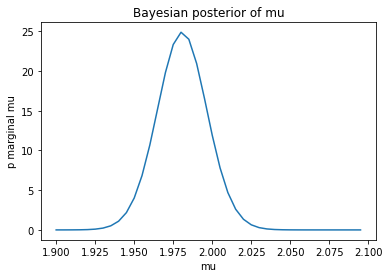

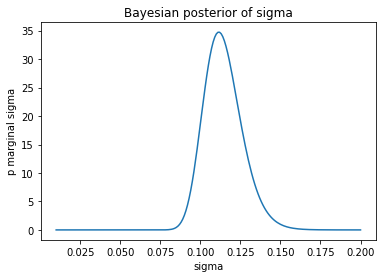

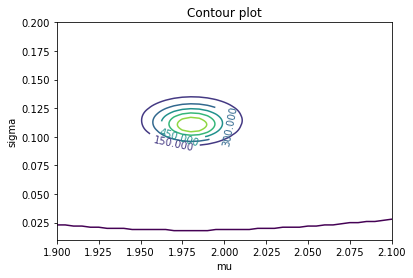

In [5]:
sumL = 0
for i in range(len(mu_grid)):
    sumL += sum(L_matrix[i, :])

L_norm_matrix = L_matrix/sumL

posterior_approx = L_norm_matrix/(delta_mu*delta_sigma)

sums_per_rows_in_L_norm = np.zeros(len(mu_grid))
for i in range(len(mu_grid)):
  sums_per_rows_in_L_norm[i] = sum(L_norm_matrix[i, :])

sums_per_cols_in_L_norm = np.zeros(len(sigma_grid))
for j in range(len(sigma_grid)):
  sums_per_cols_in_L_norm[j] = sum(L_norm_matrix[:, j])

marginal_mu_posterior_approx = sums_per_rows_in_L_norm/delta_mu
marginal_sigma_posterior_approx = sums_per_cols_in_L_norm/delta_sigma

plt.plot(mu_grid[380:420], marginal_mu_posterior_approx[380:420])
plt.title('Bayesian posterior of mu')
plt.xlabel('mu')
plt.ylabel('p marginal mu')
plt.show()

plt.plot(sigma_grid, marginal_sigma_posterior_approx)
plt.title('Bayesian posterior of sigma')
plt.xlabel('sigma')
plt.ylabel('p marginal sigma')
plt.show()

# Set the x axis and y axis limits
pylab.xlim([mu_grid[380], mu_grid[420]])
pylab.ylim([sigma_grid[0], sigma_grid[-1]])
# Provide a title for the contour plot
plt.title('Contour plot')
# Set x axis label for the contour plot
plt.xlabel('mu')
# Set y axis label for the contour plot
plt.ylabel('sigma')
# Create contour lines or level curves using matplotlib.pyplot module
contours = plt.contour(mu_grid, sigma_grid, np.transpose(posterior_approx))
# Display z values on contour lines
plt.clabel(contours, inline=1, fontsize=10)
# Display the contour plot
plt.show()

Exercise B:3 - Uncertainty about the Maximum Likelihood point estimate with same/more/less data

a)

In [6]:
# generate data
mu = 2
sigma = 0.1
N = 50
X = np.random.normal(loc=mu, scale=sigma, size=N)

# define grid
mu_first=0
mu_last=3
delta_mu=0.005
sigma_first=0.01
sigma_last=0.2
delta_sigma=0.001
mu_grid = np.arange(mu_first, mu_last+delta_mu, delta_mu)
sigma_grid = np.arange(sigma_first, sigma_last+delta_sigma, delta_sigma)

# probability density function of the normal distribution
def prob_N(xn, mu, sigma):
  return (1/(sigma*np.sqrt(2*np.pi)))*np.exp(-((xn-mu)**2)/(2*sigma**2))

# build matrix for L values
L_matrix = np.zeros((len(mu_grid), len(sigma_grid)))
for i in range(len(mu_grid)):
  for j in range(len(sigma_grid)):
    multiplier = 1
    for xn in X:
      multiplier = multiplier*prob_N(xn, mu_grid[i], sigma_grid [j])
    L_matrix[i, j] = multiplier

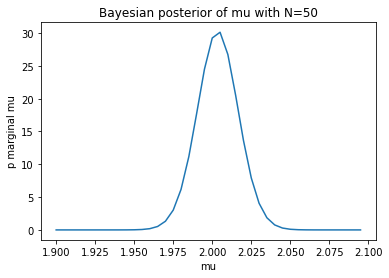

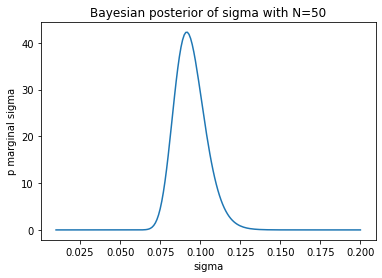

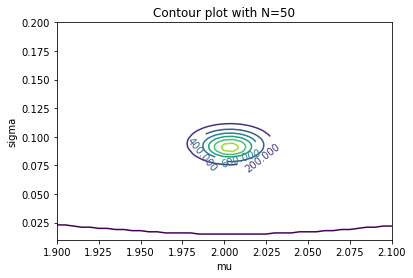

In [7]:
sumL = 0
for i in range(len(mu_grid)):
  sumL += sum(L_matrix[i, :])

L_norm_matrix = L_matrix/sumL

posterior_approx = L_norm_matrix/(delta_mu*delta_sigma)

sums_per_rows_in_L_norm = np.zeros(len(mu_grid))
for i in range(len(mu_grid)):
  sums_per_rows_in_L_norm[i] = sum(L_norm_matrix[i, :])

sums_per_cols_in_L_norm = np.zeros(len(sigma_grid))
for j in range(len(sigma_grid)):
  sums_per_cols_in_L_norm[j] = sum(L_norm_matrix[:, j])

marginal_mu_posterior_approx = sums_per_rows_in_L_norm/delta_mu
marginal_sigma_posterior_approx = sums_per_cols_in_L_norm/delta_sigma

plt.plot(mu_grid[380:420], marginal_mu_posterior_approx[380:420])
plt.title('Bayesian posterior of mu with N='+str(N))
plt.xlabel('mu')
plt.ylabel('p marginal mu')
plt.show()

plt.plot(sigma_grid, marginal_sigma_posterior_approx)
plt.title('Bayesian posterior of sigma with N='+str(N))
plt.xlabel('sigma')
plt.ylabel('p marginal sigma')
plt.show()

# Set the x axis and y axis limits
pylab.xlim([mu_grid[380], mu_grid[420]])
pylab.ylim([sigma_grid[0], sigma_grid[-1]])
# Provide a title for the contour plot
plt.title('Contour plot with N='+str(N))
# Set x axis label for the contour plot
plt.xlabel('mu')
# Set y axis label for the contour plot
plt.ylabel('sigma')
# Create contour lines or level curves using matplotlib.pyplot module
contours = plt.contour(mu_grid, sigma_grid, np.transpose(posterior_approx))
# Display z values on contour lines
plt.clabel(contours, inline=1, fontsize=10)
# Display the contour plot
plt.show()

The plots are visually different from the plots obtained in the previous exercise, that's because the sample size (N=50) is small. The results are not stable with such a small sample size.

b)

In [8]:
# generate data
mu = 2
sigma = 0.1
N = 300
X = np.random.normal(loc=mu, scale=sigma, size=N)

# define grid
mu_first=0
mu_last=3
delta_mu=0.005
sigma_first=0.01
sigma_last=0.2
delta_sigma=0.001
mu_grid = np.arange(mu_first, mu_last+delta_mu, delta_mu)
sigma_grid = np.arange(sigma_first, sigma_last+delta_sigma, delta_sigma)

# probability density function of the normal distribution
def prob_N(xn, mu, sigma):
  return (1/(sigma*np.sqrt(2*np.pi)))*np.exp(-((xn-mu)**2)/(2*sigma**2))

# build matrix for L values
L_matrix = np.zeros((len(mu_grid), len(sigma_grid)))
for i in range(len(mu_grid)):
  for j in range(len(sigma_grid)):
    multiplier = 1
    for xn in X:
      multiplier = multiplier*prob_N(xn, mu_grid[i], sigma_grid [j])
    L_matrix[i, j] = multiplier

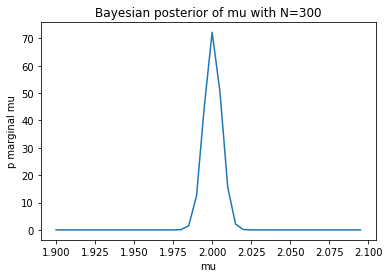

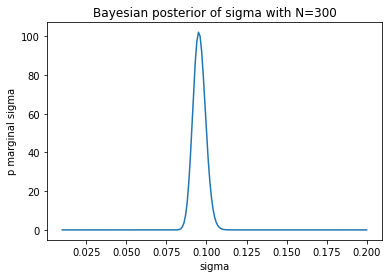

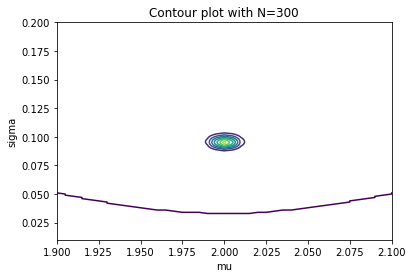

In [9]:
sumL = 0
for i in range(len(mu_grid)):
  sumL += sum(L_matrix[i, :])

L_norm_matrix = L_matrix/sumL

posterior_approx = L_norm_matrix/(delta_mu*delta_sigma)

sums_per_rows_in_L_norm = np.zeros(len(mu_grid))
for i in range(len(mu_grid)):
  sums_per_rows_in_L_norm[i] = sum(L_norm_matrix[i, :])

sums_per_cols_in_L_norm = np.zeros(len(sigma_grid))
for j in range(len(sigma_grid)):
  sums_per_cols_in_L_norm[j] = sum(L_norm_matrix[:, j])

marginal_mu_posterior_approx = sums_per_rows_in_L_norm/delta_mu
marginal_sigma_posterior_approx = sums_per_cols_in_L_norm/delta_sigma

plt.plot(mu_grid[380:420], marginal_mu_posterior_approx[380:420])
plt.title('Bayesian posterior of mu with N='+str(N))
plt.xlabel('mu')
plt.ylabel('p marginal mu')
plt.show()

plt.plot(sigma_grid, marginal_sigma_posterior_approx)
plt.title('Bayesian posterior of sigma with N='+str(N))
plt.xlabel('sigma')
plt.ylabel('p marginal sigma')
plt.show()

# Set the x axis and y axis limits
pylab.xlim([mu_grid[380], mu_grid[420]])
pylab.ylim([sigma_grid[0], sigma_grid[-1]])
# Provide a title for the contour plot
plt.title('Contour plot with N='+str(N))
# Set x axis label for the contour plot
plt.xlabel('mu')
# Set y axis label for the contour plot
plt.ylabel('sigma')
# Create contour lines or level curves using matplotlib.pyplot module
contours = plt.contour(mu_grid, sigma_grid, np.transpose(posterior_approx))
# Display z values on contour lines
plt.clabel(contours, inline=1, fontsize=10)
# Display the contour plot
plt.show()

Increasing the sample size there is a reduction of the uncertainty, the normal distributions for the mu and sigma estimates have a lower variance.

c)

In [10]:
# generate data
mu = 2
sigma = 0.1
N = 10
X = np.random.normal(loc=mu, scale=sigma, size=N)

# define grid
mu_first=0
mu_last=3
delta_mu=0.005
sigma_first=0.01
sigma_last=0.2
delta_sigma=0.001
mu_grid = np.arange(mu_first, mu_last+delta_mu, delta_mu)
sigma_grid = np.arange(sigma_first, sigma_last+delta_sigma, delta_sigma)

# probability density function of the normal distribution
def prob_N(xn, mu, sigma):
  return (1/(sigma*np.sqrt(2*np.pi)))*np.exp(-((xn-mu)**2)/(2*sigma**2))

# build matrix for L values
L_matrix = np.zeros((len(mu_grid), len(sigma_grid)))
for i in range(len(mu_grid)):
  for j in range(len(sigma_grid)):
    multiplier = 1
    for xn in X:
      multiplier = multiplier*prob_N(xn, mu_grid[i], sigma_grid [j])
    L_matrix[i, j] = multiplier

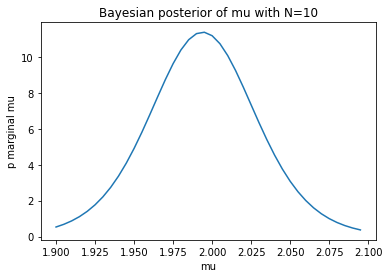

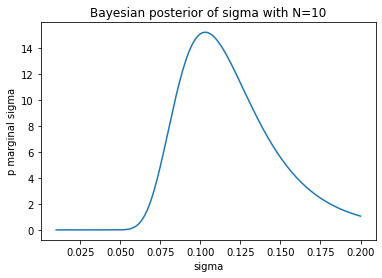

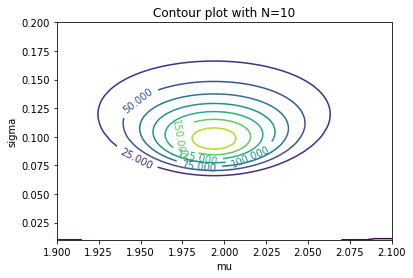

In [11]:
sumL = 0
for i in range(len(mu_grid)):
  sumL += sum(L_matrix[i, :])

L_norm_matrix = L_matrix/sumL

posterior_approx = L_norm_matrix/(delta_mu*delta_sigma)

sums_per_rows_in_L_norm = np.zeros(len(mu_grid))
for i in range(len(mu_grid)):
  sums_per_rows_in_L_norm[i] = sum(L_norm_matrix[i, :])

sums_per_cols_in_L_norm = np.zeros(len(sigma_grid))
for j in range(len(sigma_grid)):
  sums_per_cols_in_L_norm[j] = sum(L_norm_matrix[:, j])

marginal_mu_posterior_approx = sums_per_rows_in_L_norm/delta_mu
marginal_sigma_posterior_approx = sums_per_cols_in_L_norm/delta_sigma

plt.plot(mu_grid[380:420], marginal_mu_posterior_approx[380:420])
plt.title('Bayesian posterior of mu with N='+str(N))
plt.xlabel('mu')
plt.ylabel('p marginal mu')
plt.show()

plt.plot(sigma_grid, marginal_sigma_posterior_approx)
plt.title('Bayesian posterior of sigma with N='+str(N))
plt.xlabel('sigma')
plt.ylabel('p marginal sigma')
plt.show()

# Set the x axis and y axis limits
pylab.xlim([mu_grid[380], mu_grid[420]])
pylab.ylim([sigma_grid[0], sigma_grid[-1]])
# Provide a title for the contour plot
plt.title('Contour plot with N='+str(N))
# Set x axis label for the contour plot
plt.xlabel('mu')
# Set y axis label for the contour plot
plt.ylabel('sigma')
# Create contour lines or level curves using matplotlib.pyplot module
contours = plt.contour(mu_grid, sigma_grid, np.transpose(posterior_approx))
# Display z values on contour lines
plt.clabel(contours, inline=1, fontsize=10)
# Display the contour plot
plt.show()

If the sample size is reduced, the incertainty increases. The normal distributions for the mu and sigma estimates have a higher variance.

Exercise B:4 - Posterior distribution for an unknown classification error rate q

a)

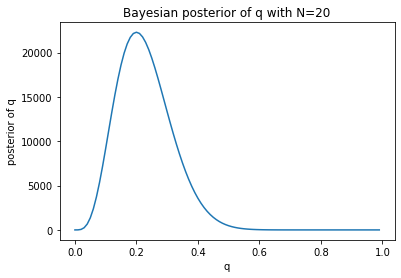

In [12]:
# observation
k = 4
N = 20

# combinatorial calculation
f = math.factorial
combinatorial = f(N)/(f(k)*f(N-k))

# probability density function of the binomial distribution
def binomial(k, q, N):
  return combinatorial*(q**k)*(1-q)**(N-k)

# calculate likelihoods
q = np.arange(0, 1, 0.01)
L_vector = np.zeros(len(q))
k = 4
N = 20
for i in range(len(q)):
  L_vector[i] = binomial(k, q[i], N)

# calculate normalization constant
J = 1000
a = 0
b = 0.5
delta_theta =  (b-a)/J
theta_vec = np.linspace(a, b, J)
sum = 0
for theta in theta_vec:
  sum += (theta**k)*(1-theta)**(N-k)
I = delta_theta*sum

# calcultate posterior distribution
posterior_of_q = L_vector/I

plt.plot(q, posterior_of_q)
plt.title('Bayesian posterior of q with N='+str(N))
plt.xlabel('q')
plt.ylabel('posterior of q')
plt.show()

b)

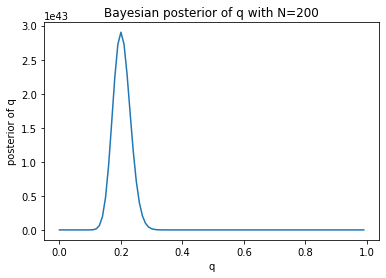

In [13]:
# observation
k = 40
N = 200

# combinatorial calculation
f = math.factorial
combinatorial = f(N)/(f(k)*f(N-k))

# probability density function of the binomial distribution
def binomial(k, q, N):
  return combinatorial*(q**k)*(1-q)**(N-k)

# calculate likelihoods
q = np.arange(0, 1, 0.01)
L_vector = np.zeros(len(q))
for i in range(len(q)):
  L_vector[i] = binomial(k, q[i], N)

# calculate normalization constant
J = 1000
a = 0
b = 0.5
delta_theta =  (b-a)/J
theta_vec = np.linspace(a, b, J)
sum = 0
for theta in theta_vec:
  sum += (theta**k)*(1-theta)**(N-k)
I = delta_theta*sum

# calcultate posterior distribution
posterior_of_q = L_vector/I

plt.plot(q, posterior_of_q)
plt.title('Bayesian posterior of q with N='+str(N))
plt.xlabel('q')
plt.ylabel('posterior of q')
plt.show()

Uncertainty decreases when increasing the sample size.